In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# the Index column has binary value
binary_index = [6, 11, 13, 14, 20, 21]

# the Index column has categorical value
categorical_index = [1, 2, 3]

# tên các cột
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","level"])
print(len(col_names))
categorical_columns=['protocol_type', 'service', 'flag'] 

43


In [4]:
df_train = pd.read_csv("D:\\CODE\\Dataset\\NSL-KDD\\KDDTrain+.txt", encoding="utf-8-sig", names = col_names)
df_test = pd.read_csv("D:\\CODE\\Dataset\\NSL-KDD\\KDDTest+.txt", encoding="utf-8-sig", names = col_names)
df_train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [5]:
# remove attribute 'difficulty_level' 
df_train.drop(['level'],axis=1,inplace=True)
df_test.drop(['level'],axis=1,inplace=True) # làm tương tự trên tập test

df_train.shape

(125973, 42)

In [6]:
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# number of attack labels 
df_train['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [8]:
# number of attack labels - test
df_test['label'].value_counts()

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: label, dtype: int64

In [9]:
# changing attack labels to their respective attack class -> thay thế tên nhãn
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [10]:
# calling change_label() function
change_label(df_train)
change_label(df_test)

In [11]:
# distribution of attack classes
df_train.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

In [12]:
# distribution of attack classes
df_test.label.value_counts()

normal    9711
Dos       7460
R2L       2885
Probe     2421
U2R         67
Name: label, dtype: int64

In [13]:
# nhập các thư viện cần thiết để chuẩn hóa dữ liệu
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [14]:
# selecting numeric attributes columns from data
numeric_col_train = df_train.select_dtypes(include='number').columns

# selecting các đặc trưng thuộc tính ở dạng numeric trên 2 tập train và test
numeric_col_test = df_test.select_dtypes(include='number').columns

In [15]:
numeric_col_train

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [16]:
# using standard scaler for normalizing: đồng nhất các dữ liệu dạng số
std_scaler = StandardScaler()
def DataNormalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [17]:
# calling the DataNormalization() function
df_train = DataNormalization(df_train.copy(), numeric_col_train)

df_test = DataNormalization(df_test.copy(), numeric_col_test)

In [18]:
df_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


In [19]:
# xử lý các giá trị danh mục với one hot encoding

In [20]:
# selecting categorical data attributes
categorical_col = ['protocol_type','service','flag']

In [21]:
# creating a dataframe with only categorical attributes
categorical_df_train = df_train[categorical_col]

categorical_df_test = df_test[categorical_col]

# xem 5 dòng đầu
categorical_df_train.head(5)

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [22]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function: đặt tên giả cho các biến danh mục
categorical_df_train = pd.get_dummies(categorical_df_train,columns=categorical_col)

categorical_df_test = pd.get_dummies(categorical_df_test,columns=categorical_col)

categorical_df_train.head(5)

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# service_train =df_train['service'].tolist()
# service_test = df_test['service'].tolist()
# difference=list(set(service_train) - set(service_test))
# string = 'service_'
# difference=[string + x for x in difference]
# difference


# for col in difference:
#     testdf_cat_data[col] = 0
# testdf_cat_data.shape

In [24]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = df_train.copy()
# multi_df_test = df_test.copy

multi_label = pd.DataFrame(multi_data.label)
# multi_label_test = pd.DataFrame(multi_df_test.label)

In [29]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
categorical_label = preprocessing.LabelEncoder()
label_enc = multi_label.apply(categorical_label.fit_transform)
multi_data['intrusion'] = label_enc

In [30]:
# categorical_label = preprocessing.LabelEncoder()
# label_enc_test = multi_label_test.apply(categorical_label.fit_transform)
# multi_df_test['intrusion'] = label_enc

In [31]:
# categorical_label.classes_

AttributeError: 'LabelEncoder' object has no attribute 'classes'

In [32]:
np.save("D:\\CODE\\IoT\\data\\categorical_label_classes.npy",categorical_label.classes_,allow_pickle=True)

In [33]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data, columns=['label'],prefix="",prefix_sep="") 
multi_data['label'] = multi_label
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.224532,-0.376387,4,0,0,0,0,1,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.602433,-0.387635,-0.345084,4,0,0,0,0,1,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.355014,-0.376387,4,0,0,0,0,1,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos


In [35]:
multi_data['intrusion'].values

array([4, 4, 0, ..., 4, 0, 4])

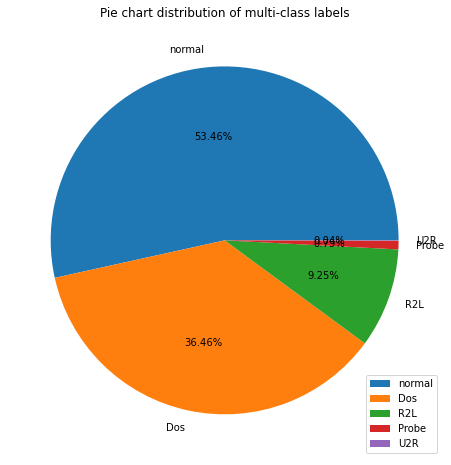

In [36]:
# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(), labels = multi_data.label.unique(), autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.savefig('D:\\CODE\\IoT\\Analysis Data\\image\\Pie_chart_multi.png')
plt.show()

In [37]:
# feature extraction

In [39]:
# creating a dataframe with only numeric attributes of multi-class dataset and encoded label attribute 
numeric_multi = multi_data[numeric_col_train]
numeric_multi['intrusion'] = multi_data['intrusion']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1224\1487954976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi['intrusion'] = multi_data['intrusion']


In [40]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
# Độ tương quan (Correlation)
correlation = numeric_multi.corr()
correlation_y = abs(correlation['intrusion'])
highest_corr = correlation_y[correlation_y > 0.5] # Threshold = 0.5 (ngưỡng)
highest_corr.sort_values(ascending=True)

count                       0.613251
logged_in                   0.693770
srv_serror_rate             0.710852
serror_rate                 0.712861
dst_host_serror_rate        0.714247
dst_host_same_srv_rate      0.716820
dst_host_srv_serror_rate    0.717387
dst_host_srv_count          0.718579
same_srv_rate               0.798358
intrusion                   1.000000
Name: intrusion, dtype: float64

In [41]:
# selecting attributes found by using pearson correlation coefficient: trích chọn đặc trưng
numeric_multi = multi_data[['count','logged_in','srv_serror_rate','serror_rate','dst_host_serror_rate',
                        'dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_count','same_srv_rate']]

In [42]:
from sklearn.impute import SimpleImputer
dfr_temp = correlation_y.to_frame()
# dfr_temp.iloc[10].name
print(dfr_temp.shape)
print(dfr_temp)

(39, 1)
                             intrusion
duration                      0.016708
src_bytes                     0.003023
dst_bytes                     0.002239
land                          0.008343
wrong_fragment                0.105607
urgent                        0.005085
hot                           0.040848
num_failed_logins             0.013342
logged_in                     0.693770
num_compromised               0.010073
root_shell                    0.029388
su_attempted                  0.022293
num_root                      0.011344
num_file_creations            0.022609
num_shells                    0.014300
num_access_files              0.037037
num_outbound_cmds                  NaN
is_host_login                 0.002592
is_guest_login                0.062581
count                         0.613251
srv_count                     0.015167
serror_rate                   0.712861
srv_serror_rate               0.710852
rerror_rate                   0.219307
srv_rerror_rate  

In [43]:
# xử lấy giá trị nan
miss_nan = dfr_temp.iloc[:].values
imputer = SimpleImputer(missing_values = np.nan, strategy="mean")
imputer.fit(miss_nan[:])
miss_nan[:] = imputer.transform(miss_nan[:])
print('After', dfr_temp)

After                              intrusion
duration                      0.016708
src_bytes                     0.003023
dst_bytes                     0.002239
land                          0.008343
wrong_fragment                0.105607
urgent                        0.005085
hot                           0.040848
num_failed_logins             0.013342
logged_in                     0.693770
num_compromised               0.010073
root_shell                    0.029388
su_attempted                  0.022293
num_root                      0.011344
num_file_creations            0.022609
num_shells                    0.014300
num_access_files              0.037037
num_outbound_cmds             0.253391
is_host_login                 0.002592
is_guest_login                0.062581
count                         0.613251
srv_count                     0.015167
serror_rate                   0.712861
srv_serror_rate               0.710852
rerror_rate                   0.219307
srv_rerror_rate    

label (x) ['intrusion', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_srv_serror_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'serror_rate', 'srv_serror_rate', 'logged_in', 'count', 'dst_host_count', 'num_outbound_cmds', 'dst_host_rerror_rate', 'rerror_rate', 'srv_rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_diff_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'wrong_fragment', 'is_guest_login', 'hot', 'num_access_files', 'root_shell', 'num_file_creations', 'su_attempted', 'duration', 'srv_count', 'num_shells', 'num_failed_logins', 'num_root', 'num_compromised', 'land', 'dst_host_srv_diff_host_rate', 'urgent', 'dst_host_same_src_port_rate', 'src_bytes', 'is_host_login', 'dst_bytes']
percentage of zeros sample (y):  [1.0, 0.798358014597307, 0.718579395055923, 0.7173871797459173, 0.7168199321998668, 0.7142465851438847, 0.7128612431546774, 0.7108515570247843, 0.693770454181582, 0.6132509824715674, 0.4196157930140496, 0.2533908281773445, 0.22363069087696946, 0.21930

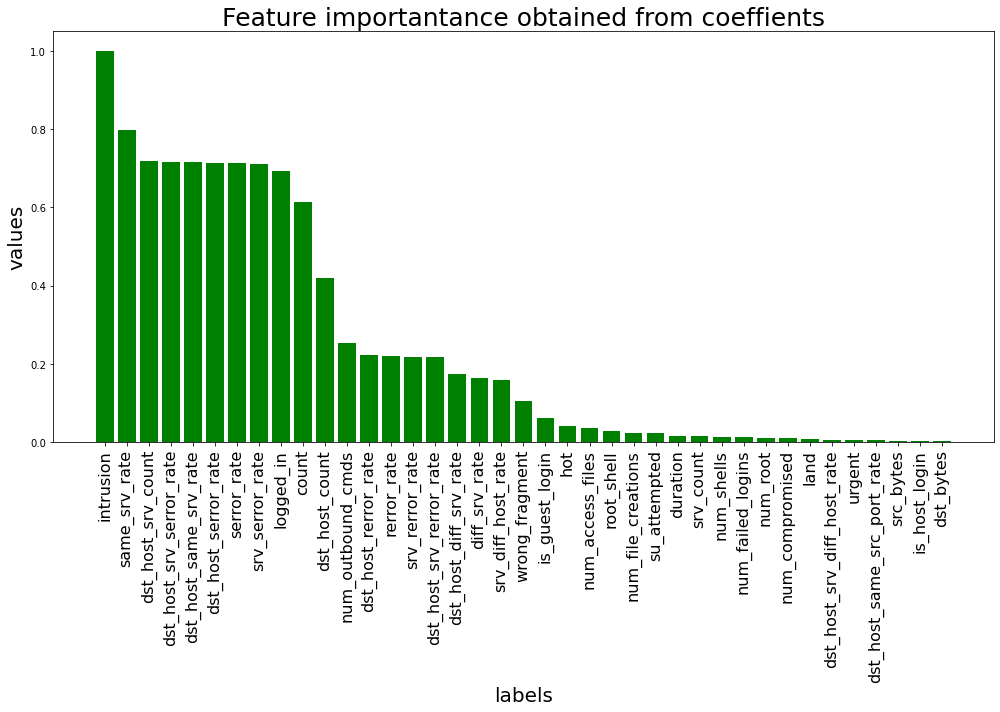

In [44]:
# draw chart about feature important coefficients
x = []
y = []
dfr_temp = dfr_temp.sort_values(by='intrusion', ascending=False)
for i in range(dfr_temp.shape[0]):
    x.append(dfr_temp.iloc[i].name)
    y.append(dfr_temp.iloc[i].item())
print('label (x)', x)
print('percentage of zeros sample (y): ', y)
# y.sort(reverse=True)
# print(y)
plt.figure(figsize=(14, 10), tight_layout=True)
plt.bar(x, y, fc = 'green')# color=(0.2, 0.4, 0.6, 0.6) fc = 'green'
# plt.bar_label(chart, labels=x, label_type="edge")
plt.xticks(rotation=90, fontsize=16)
plt.xlabel('labels', fontsize=20)
plt.ylabel('values', fontsize=20)
plt.title('Feature importantance obtained from coeffients', fontsize=25)
plt.show()

In [46]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_multi = numeric_multi.join(categorical_df_train)
# then joining encoded, one-hot-encoded, and original attack label attribute
multi_data = numeric_multi.join(multi_data[['intrusion','Dos','Probe','R2L','U2R','normal','label']])

In [47]:
# saving final dataset to disk
multi_data.to_csv('D:\\CODE\\IoT\\Analysis Data\\multi_data.csv')

# final dataset for multi-class classification
multi_data

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,-0.782367,-0.624871,-0.818890,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
1,-0.620982,-0.809262,-0.631929,-0.637209,-0.639532,-1.161030,-0.624871,-1.035688,-1.321428,0,...,0,1,0,4,0,0,0,0,1,normal
2,0.339648,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.809857,-1.389669,0,...,0,0,0,0,1,0,0,0,0,Dos
3,-0.690846,1.235694,-0.184522,-0.189235,-0.572083,1.066401,-0.602433,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
4,-0.472521,1.235694,-0.631929,-0.637209,-0.639532,1.066401,-0.624871,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.818890,-1.184947,0,...,0,0,0,0,1,0,0,0,0,Dos
125969,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,0.977304,-0.624871,1.159389,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125970,-0.725778,1.235694,-0.631929,-0.637209,0.979238,-0.893738,-0.624871,-0.773724,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125971,0.523041,-0.809262,1.605104,1.602664,1.608759,-1.094207,1.618955,-0.972455,-1.366922,0,...,0,0,0,0,1,0,0,0,0,Dos


In [ ]:
# from sklearn.metrics import confusion_matrix
# mtx = confusion_matrix(Y_test, Y_pred)
# print(mtx)
# from sklearn import metrics
# print(
#     "Report:\n%s\n"
#     % (metrics.classification_report(Y_test, Y_pred))
# )
# (tp, fp), (fn, tn)  = mtx

# accuracy = (tp+tn)/(tp+fp+tn+fn)
# precision = (tp)/(tp+fp)
# recall = (tp)/(tp+fn)
# npv = (tn)/(tn+fn)
# miss_rate = (fn)/(tp+fn)
# fall_out = (fp)/(tn+fp)
# fdr = (fp)/(fp+tp)
# false_omission_rate = (fn)/(fn+tn)
# f1_score = (2*precision*recall)/(precision+recall)

# print(f'[+] Accuracy: {accuracy:.4f}')
# print(f'[+] Recall: {recall:.4f}')
# print(f'[+] Precision: {precision:.4f}')
# print(f'[+] NegativePredictive Value: {npv:.4f}')
# print(f'[+] Miss rate: {miss_rate:.4f}')
# print(f'[+] Fall-Out: {fall_out:.4f}')
# print(f'[+] False Discovery Rate: {fdr:.4f}')
# print(f'[+] False Omission Rate: {false_omission_rate:.4f}')
# print(f'[+] F1 score: {f1_score:.4f}')



# from sklearn.datasets import make_classification
# from tensorflow.keras.models import load_model
# # create the dataset
# X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)
# # load the model from file
# model = load_model('model.h5')
# # make a prediction
# row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
# yhat = model.predict([row])
# print('Predicted: %.3f' % yhat[0])
